# 7641 ML Assignment 2 Part 2

## Import Libraries

In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import matplotlib.pyplot as plt
import mlrose_hiive
import mlrose
import mlrose_hiive
import numpy as np
import pandas as pd
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

## Import Dataset

In [2]:
df = pd.read_csv("Mobile-Prediction-train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:
# Categorical features and Numerical features
num_features= df.drop(['price_range'], axis=1).select_dtypes('number').columns

cat_features = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[num_features].columns}')
print('\n')
print(f'Categorical Columns: {df[cat_features].columns}')

Numerical Columns:  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


Categorical Columns: Index([], dtype='object')


### Data Preprocessing

In [5]:
X = df.drop('price_range', axis = 1).values
y = df['price_range'].values

In [6]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

### Back Prop

In [7]:
clf = mlrose_hiive.NeuralNetwork(hidden_nodes=[5], activation='tanh',
                           algorithm = 'gradient_descent',early_stopping = True,
                           max_attempts = 100, max_iters = 5000,
                           bias = True, learning_rate = .0001,
                           restarts=0, curve = True, random_state=1)

In [8]:
start_time = time.time()
clf.fit(X_train, y_train_hot)
end_time = time.time()
gd_total_time = end_time-start_time

y_pred = clf.predict(X_test)
final_score = accuracy_score(y_test_hot, y_pred)

gd_fitness_curve = clf.fitness_curve

### Randomized Hill Climbing

In [9]:
clf = mlrose_hiive.NeuralNetwork(hidden_nodes=[5], activation='tanh',
                           algorithm = 'random_hill_climb', early_stopping = True,
                           max_attempts = 100, max_iters = 5000,
                           bias = True, learning_rate = .0001,
                           restarts=0, curve = True, random_state=1)

In [10]:
start_time = time.time()
clf.fit(X_train, y_train_hot)
end_time = time.time()
rhc_total_time = end_time-start_time

y_pred = clf.predict(X_test)
rhc_final_score = accuracy_score(y_test_hot, y_pred)

rhc_fitness_curve = clf.fitness_curve

### Simulated Annealing

In [11]:
clf = mlrose_hiive.NeuralNetwork(hidden_nodes=[5], activation='tanh',
                           algorithm = 'simulated_annealing', early_stopping = True,
                           max_attempts = 100, max_iters = 5000,
                           bias = True, learning_rate = .0001,
                           restarts=0, curve = True, random_state=1)

In [12]:
start_time = time.time()
clf.fit(X_train, y_train_hot)
end_time = time.time()
sa_total_time = end_time-start_time

y_pred = clf.predict(X_test)
sa_final_score = accuracy_score(y_test_hot, y_pred)

sa_fitness_curve = clf.fitness_curve

### Genetic Algorithm

In [13]:
clf = mlrose_hiive.NeuralNetwork(hidden_nodes=[5], activation='tanh',
                           algorithm = 'genetic_alg', early_stopping = True,
                           max_attempts = 100, max_iters = 5000,
                           bias = True, learning_rate = .0001,
                           restarts=0, curve = True, random_state=1)

In [14]:
start_time = time.time()
clf.fit(X_train, y_train_hot)
end_time = time.time()
ga_total_time = end_time-start_time

y_pred = clf.predict(X_test)
final_score = accuracy_score(y_test_hot, y_pred)

ga_fitness_curve = clf.fitness_curve

### Algorithm Total Times

In [20]:
print('Algorithm Total Times')
print('Back Prop: ' + str(gd_total_time))
print('Randomized Hill Climbing: ' + str(rhc_total_time))
print('Simulated Annealing: '+ str(sa_total_time))
print('Genetic Algorithm: ' + str(ga_total_time))

Algorithm Total Times
Back Prop: 25.21248197555542
Randomized Hill Climbing: 14.695816278457642
Simulated Annealing: 23.14922571182251
Genetic Algorithm: 364.22663831710815


## Plots

Text(0, 0.5, 'Loss')

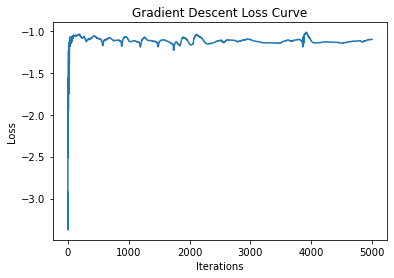

In [15]:
# Gradient Descent
plt.plot(gd_fitness_curve)
plt.title('Gradient Descent Loss Curve')
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

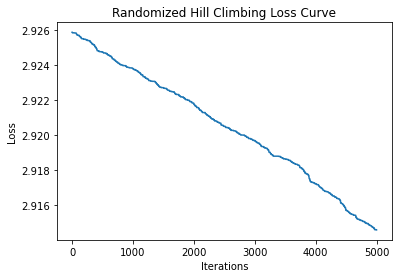

In [16]:
# Randomized Hill Climbing
plt.plot(rhc_fitness_curve[:,0])
plt.title('Randomized Hill Climbing Loss Curve')
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

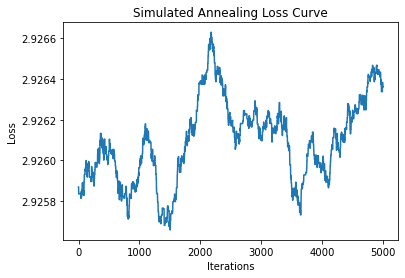

In [17]:
# Simulated Annealing
plt.plot(sa_fitness_curve[:,0])
plt.title('Simulated Annealing Loss Curve')
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

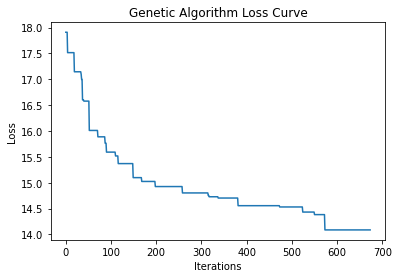

In [18]:
# Genetic Algorithm
plt.plot(ga_fitness_curve[:,0])
plt.title('Genetic Algorithm Loss Curve')
plt.xlabel("Iterations")
plt.ylabel("Loss")